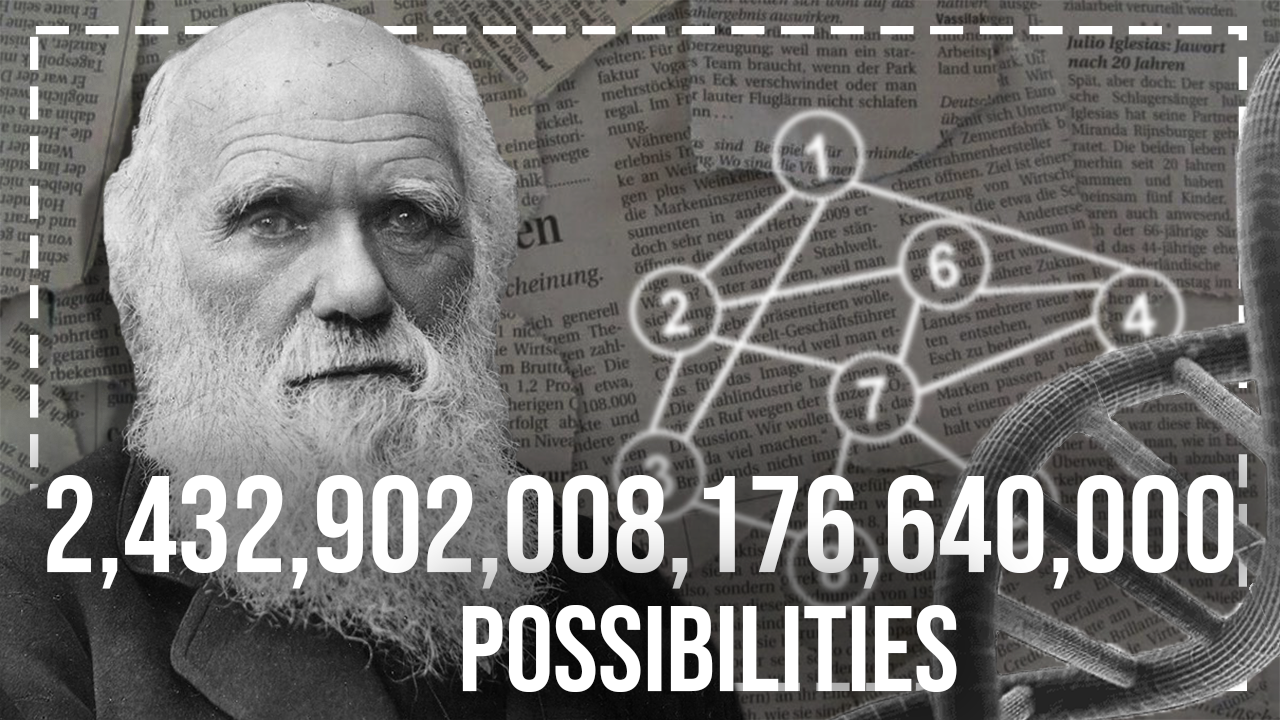

# Traveling Salesman

You are a merchant a few centuries ago with the mission of selling your merchandise in all the cities of your kingdom, and to do so, you will have to visit all of them one by one, starting from the city of origin and returning to it at the end, as you Do you choose the order of cities you are going to visit so that you have to walk the shortest possible distance?

This is the traveling salesman problem, first introduced in the 19th century by William Rowan and Thomas Kirkman and the problem can be represented as shown in the image below.

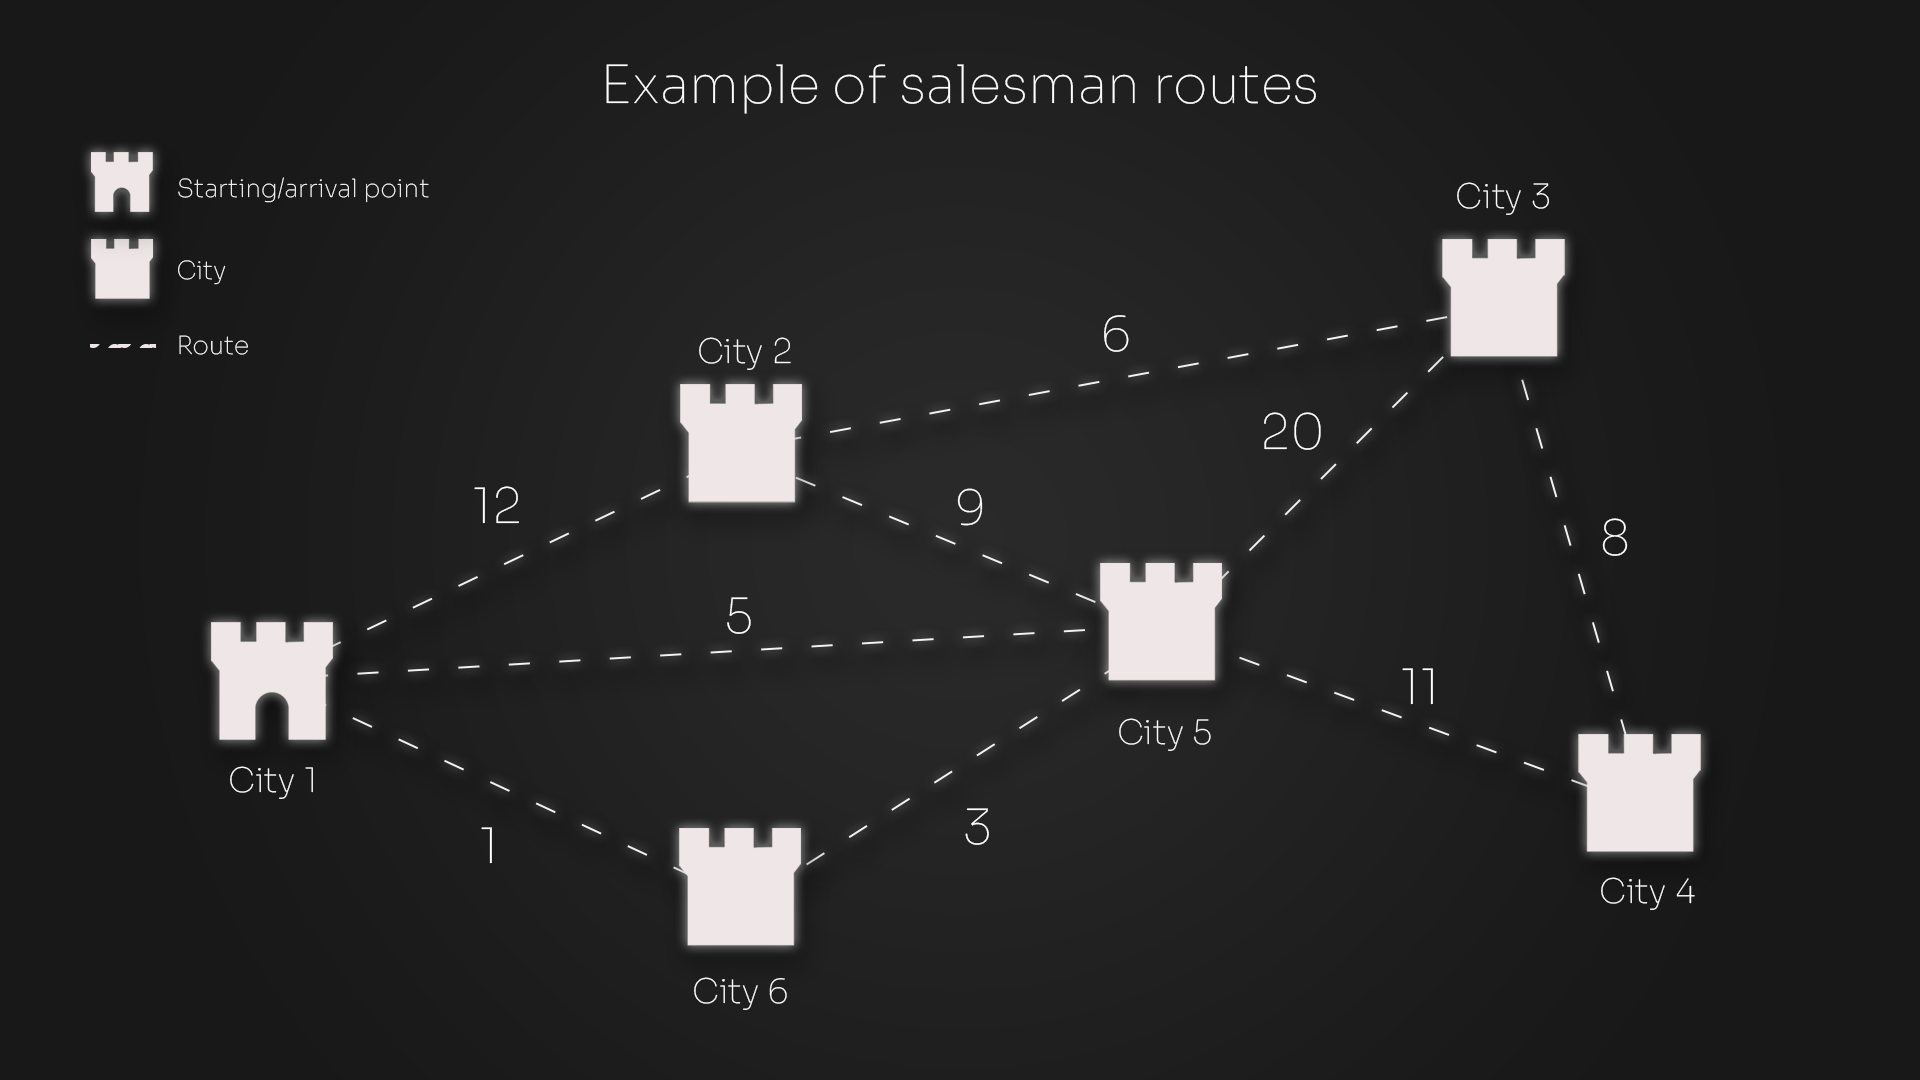

We have city one, which will serve as both a departure and arrival point, and from there, you can walk to the other cities using routes, where each one has its own cost (could be kilometers, for example). So, knowing that the clerk will leave and return to the city of origin, how do you choose the shortest route? We can simply draw the different possible routes and select the one with the smallest sum of distances, right?

#Understanding the problem mathematically

For the example given, we can mentally build an intuition of the best path just by looking at the image for a few seconds, however, for didactic and practical reasons, let's change the problem a little.

Now, we assume that you can leave one city for any other, that is, all cities are interconnected. Which will mean that, for example, in a kingdom with three cities, where I will represent each one below by its respective number, with city 1 as origin and arrival, there will be the following possibilities:

1, 2, 3, 1

1, 3, 2, 1

In total there are 2 possibilities.

For a 4-city kingdom:

1, 2, 3, 4, 1

1, 2, 4, 3, 1

1, 3, 2, 4, 1

1, 3, 4, 2, 1

1, 4, 3, 2, 1

1, 4, 2, 3, 1

In total there are 6 possibilities.

We can observe that the problem follows the nature of, with n being the number of cities, the number of different routes will be (n-1)!. Great, even in a problem with 5 cities, we will have 24 possibilities that we can calculate relatively quickly and get the answer. (Note that n-1 is given by the fact that the clerk leaves and returns to the same city, if he didn't do so, it would just be n!, leaving any city, and arriving in any other passing through once and for all).

But what happens as the number of cities increases? Well, for 6 cities we have 120 possibilities.

For 7 cities, 720 possibilities.

For 8 cities, 5,040 possibilities.

For 9 cities, 40,320 possibilities.

For 10 cities, 362,880 possibilities.

For 11 cities, 3,628,800 possibilities.

For 12 cities, 39,916,800 possibilities.

# A computational approach

We can see that the problem grows exaggeratedly quickly. What would happen if we needed to calculate an example with 25 cities, for example? We would have 2,432,902,008,176,640,000 quintillion possibilities. Certainly an impossible task to do by hand, could the computer solve this problem by calculating all the routes?

To do this, we will use the computer itself for testing, we will run a program that tests the traveling salesman to test all the possible routes between cities. Along with that, let's start with an example where there are only two cities, and then increase to calculate how long the program takes for each example as the number of cities increases.

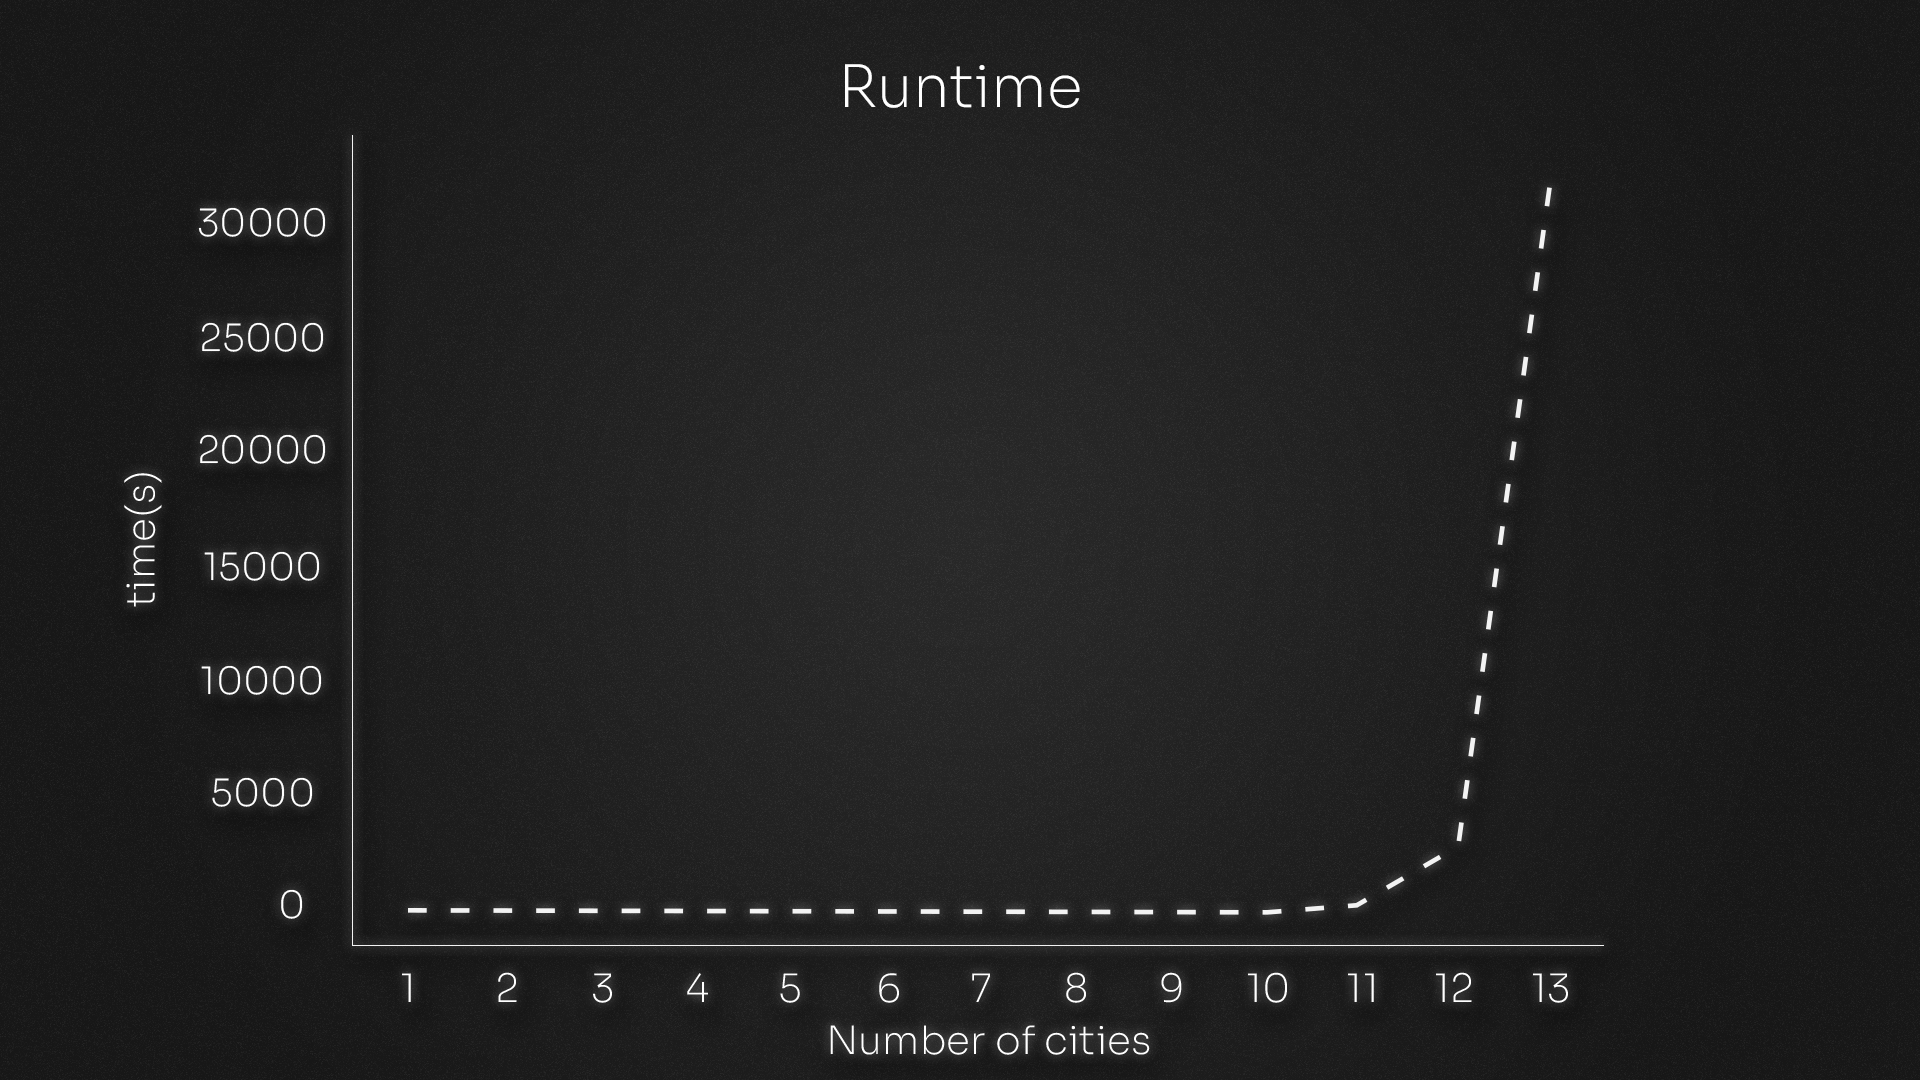

Even the example of 10 cities, the computer can solve it in less than 0 seconds. The first noticeable jump is from 11 cities to 12, however, the problem takes an even bigger jump to 13 cities, where it consumed 9 hours of processing to find the answer.

This behavior is expected because it is a problem that grows factorially. After 12 cities, it becomes impractical to use a computer to generate a solution. Imagine a GPS app that takes 9 hours to calculate a route.

Our problem is of 21 cities, it would take about 77 thousand years for a computer to calculate the answer.

# Genetic Algorithm

How can such a time-consuming problem be answered in even a few minutes?

A genetic algorithm is a metaheuristic that proposes an optimal solution to a problem with many possibilities. In other words, it will give us a satisfactory answer, but not necessarily the best possible.

Inspired by Darwin's ideas, the genetic algorithm uses the concepts of evolution to find an answer. This principle tells us that those individuals with greater aptitude for the environment in which they live will have a greater chance of procreating and spreading their genes/behaviors. For this reason we see animals today like butterflies camouflaged as brown in a forest, or a polar bear being white like the snow where it lives.

## Population

The algorithm will start from this same point to address the traveling salesman problem. Taking as context the scenario of there being several possible routes to the problem, a population with different individuals is created.

## Individual

Initially generated randomly, an individual will be responsible for a route within the problem. In other words, it initially follows any order among all possible ones.

## Genes

The information from the order of cities an individual travels through will be called the individual's genes.

## Fitness

Those individuals who obtain the shortest path within the population will be considered the fittest. From them, it is understood that to be fit, some order of cities within their genes brings part of the optimal solution.

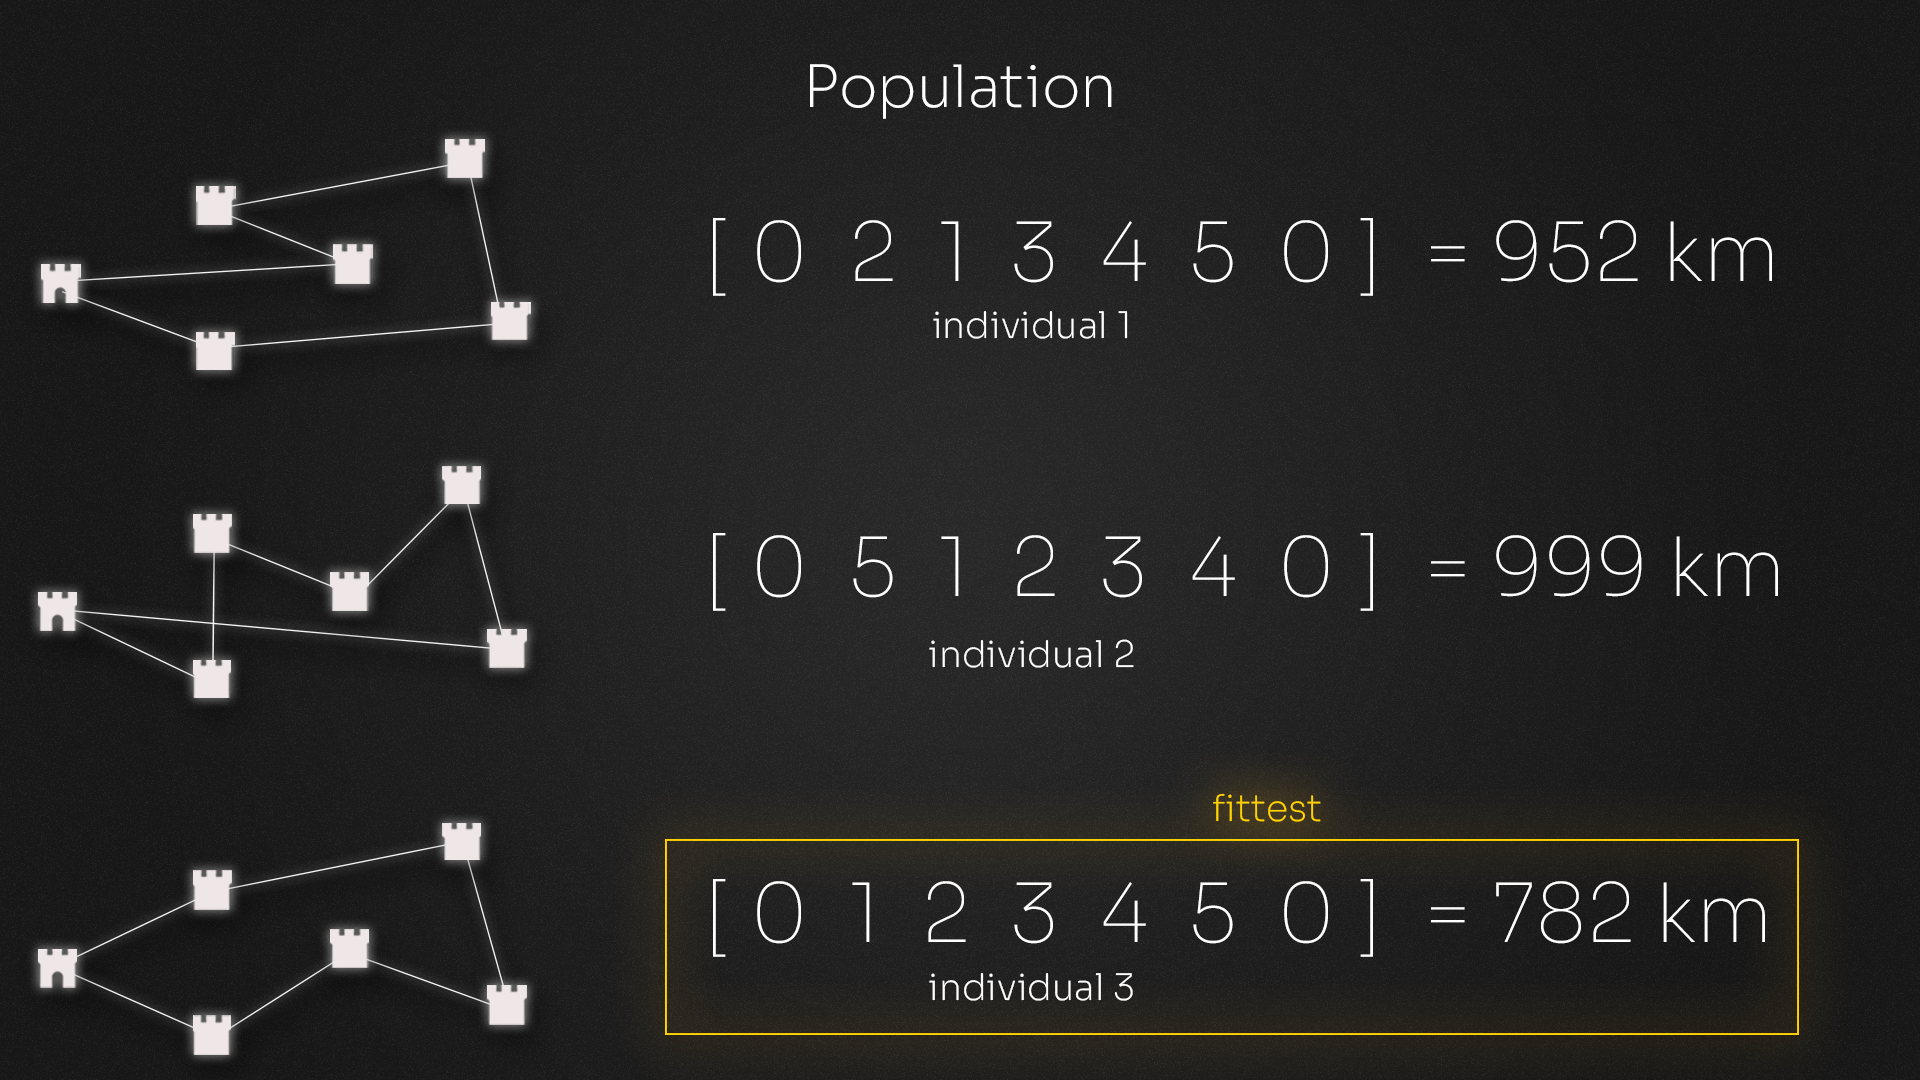

## Cross over

Once those fittest individuals are obtained, their genes are then crossed in order to build new individuals that carry the mixture of the best genes, thus forming children that are fitter than their parents.

###Wheel selection

To choose the fittest individuals, this work uses the wheel selection method. It makes up a probability wheel, similar to a pie chart. In it, the best individuals have a larger area on the graph, and for selection, a pointer is rotated and falls to a random position. Therefore, the greater the chances of the pointer falling on a good individual.

### Tournament

Another possible approach is to hold tournaments. In it, a small number of individuals are selected at random, and the one with the greatest aptitude wins the tournament and is selected.

## Replacement

After crossover, these new individuals are placed in the population replacing those with worse abilities.

## Mutation

When forming a new individual, the possibility of a mutation occurring in the genes must be considered. This can be done simply by swapping two random genes, that is, two cities along the way. This action will be responsible for ensuring that the population as a whole does not converge too quickly on an answer, and will cause the algorithm to explore solutions that are distant from those present in the population.

## Solution

These steps previously described show the processes of formation of a generation of the population. The first generation will be the one formed with random genes, the second will be where the first crossings and substitutions will occur.

To find the optimal solution, all these steps are done repeatedly, thus generating multiple generations of the population. Once enough generations have been run, the algorithm should realize that no better individuals were generated in the last few generations, and consider the best solution as optimal.

## Code

The code below, although extensive, describes each step of the genetic algorithm. At the end, it runs to find the best route within the cities present in distance_cidades.txt.

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from random import sample, random, randint
from statistics import stdev, mean

In [2]:
class GeneticAlgorithm:
    def __init__(self, distances_values, mutation_prob, number_individuals_population=100, max_generations_without_change=50):
        self.distances_values = distances_values
        self.number_individuals_population = number_individuals_population
        self.number_cities = len(distances_values)
        self.mutation_prob =  mutation_prob
        self.population = self.create_population()
        self.max_generations_without_change = max_generations_without_change

    def create_population(self):
        population = np.zeros((self.number_individuals_population, self.number_cities + 1), dtype=int)
        for i in range(self.number_individuals_population):
            population[i][1:-1] = sample(range(1, self.number_cities), self.number_cities - 1)
        return population

    def calculate_fitness(self):
        fitness = []
        for individual in self.population:
            individual_fitness = sum(self.distances_values[individual[j - 1]][individual[j]] for j in range(1, self.number_cities + 1))
            fitness.append(individual_fitness)
        return fitness

    def wheel_selection(self, fitness):
        mean_population_fitness = mean(fitness)
        parents = [individual for i, individual in enumerate(self.population) if fitness[i] > mean_population_fitness]
        return len(parents), parents

    def order_cross_crossover(self, parents):
        cut1 = 8
        cut2 = 11
        new_children = []
        for i in range(len(parents) - 1):
            individual1 = parents[i][1:-1]
            individual2 = parents[i + 1][1:-1]
            children = np.zeros(self.number_cities - 1, dtype=int)
            children[cut1:cut2] = individual1[cut1:cut2]
            children = np.roll(children, -cut2)
            individual1 = np.roll(individual1, -cut2)
            individual2 = np.roll(individual2, -cut2)
            son_index = 0
            for j in range(self.number_cities - 1):
                if individual2[j] not in children:
                    children[son_index] = individual2[j]
                    son_index += 1
            children = np.roll(children, cut2)
            children = np.insert(children, 0, 0)
            children = np.append(children, 0)
            new_children.append(children)
        return new_children

    def mutation(self, new_children):

        for child in new_children:
            if  np.random.rand() < self.mutation_prob:
                genes = sample(range(1, 20), 2)
                child[genes[0]], child[genes[1]] = child[genes[1]], child[genes[0]]
        return new_children

    def replace(self, new_children, fitness):
        child_fitness_list = [sum(self.distances_values[new_children[i][j - 1]][new_children[i][j]] for j in range(1, self.number_cities + 1)) for i in range(len(new_children))]
        duplicates = [index for index, val in enumerate(fitness) if val in fitness[:index]]
        while duplicates and new_children:
            duplicated = duplicates.pop()
            self.population[duplicated] = new_children.pop()
            fitness[duplicated] = child_fitness_list.pop()
        for child in new_children:
            higher_value = np.argmax(fitness)
            fitness[higher_value] = child_fitness_list.pop()
            self.population[higher_value] = new_children.pop()

    def run(self):
        best_individuals = []
        fitness = self.calculate_fitness()
        best_individuals.append(min(fitness))
        parents_number, parents = self.wheel_selection(fitness)
        new_children = self.order_cross_crossover(parents)
        new_children = self.mutation(new_children)
        self.replace(new_children, fitness)
        best_individuals.append(min(fitness))

        generation = 1
        while True:
            fitness = self.calculate_fitness()
            parents_number, parents = self.wheel_selection(fitness)
            new_children = self.order_cross_crossover(parents)
            new_children = self.mutation(new_children)
            self.replace(new_children, fitness)
            best_individuals.append(min(fitness))

            if (generation % 50 == 0):
              print(f'Generation: {generation}')
              print(f'Best individual: \n{self.population[np.argmin(fitness)]}\nIts value: {fitness[np.argmin(fitness)]}\n')

            if (generation % self.max_generations_without_change == 0):
                if stdev(best_individuals[-50:-1]) == 0:
                    break
            generation += 1

        print(f'Generation: {generation}')
        print(f'Best individual: \n{self.population[np.argmin(fitness)]}\nIts value: {fitness[np.argmin(fitness)]}\n')

        return best_individuals

In [3]:
number_individuals_population = 103 # @param {type:"slider", min:10, max:1000, step:10}
mutation_prob = 0.04 # @param {type:"slider", min:0, max:1, step:0.01}
max_generations_without_change = 110 # @param {type:"slider", min:10, max:500, step:10}

Generation: 50
Best individual: 
[ 0  1 19  9 12  6 11  7 16 14  2 10 17  5 18 15 13  8  4  3 20  0]
Its value: 13023.485149031067

Generation: 100
Best individual: 
[ 0  6 17 14  9 12 19 11 18 15  5  3  1 10  8  4 20 16  2  7 13  0]
Its value: 12054.476523897833

Generation: 150
Best individual: 
[ 0  5  3 13 19  9 12  6 17 14  2  7  1 10  8  4 20 16 11 18 15  0]
Its value: 11245.660423299318

Generation: 200
Best individual: 
[ 0  5  3 13 19  9 12  6 17 14  2  7  1 10  8  4 20 16 11 18 15  0]
Its value: 11245.660423299318

Generation: 220
Best individual: 
[ 0  5  3 13 19  9 12  6 17 14  2  7  1 10  8  4 20 16 11 18 15  0]
Its value: 11245.660423299318



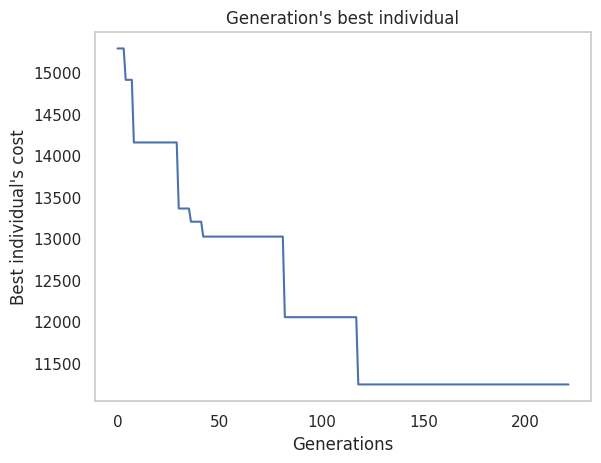

In [4]:
distances_values = np.loadtxt('city_distances.txt')
ga = GeneticAlgorithm(distances_values, mutation_prob, number_individuals_population, max_generations_without_change)
best_individuals = ga.run()

# Seaborn Settings
sns.set_theme(style="whitegrid", palette="deep")

# Plot the graph
plt.xlabel("Generations")
plt.ylabel("Best individual's cost")
plt.title("Generation's best individual")
plt.grid(False)
plt.plot(best_individuals)
plt.show()